In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

In [19]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdBu)
    plt.title(title)

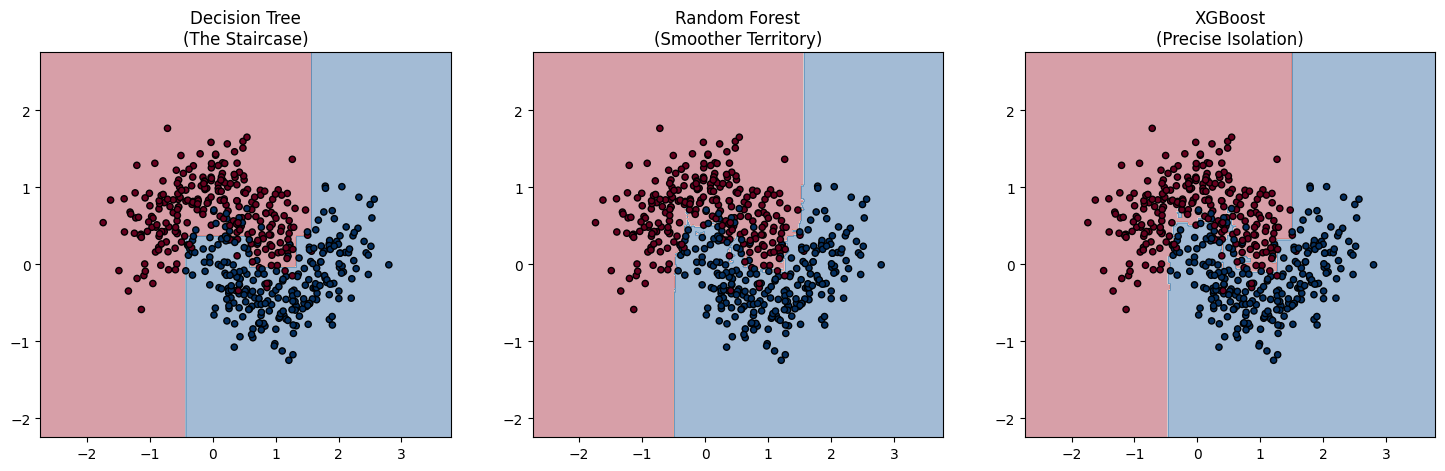

In [20]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X, y)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plot_decision_boundary(dt, X, y, "Decision Tree\n(The Staircase)")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

plt.subplot(1, 3, 2)
plot_decision_boundary(rf, X, y, "Random Forest\n(Smoother Territory)")

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X, y)

plt.subplot(1, 3, 3)
plot_decision_boundary(xgb, X, y, "XGBoost\n(Precise Isolation)")

plt.show()

In [22]:
param_grid = {
    'max_depth': [2, 6, 10],            # Blunt, Medium, Sharp
    'learning_rate': [0.01, 0.1, 1.0]   # Gentle, Normal, Aggressive
}

xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

results = grid_search.cv_results_['mean_test_score'].reshape(3, 3)


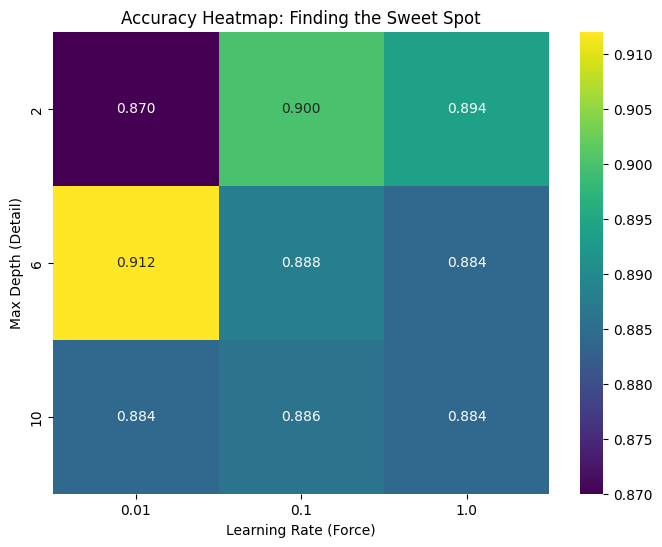

Best Combination: {'learning_rate': 0.1, 'max_depth': 2}


In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(results, 
            annot=True, 
            fmt=".3f", 
            xticklabels=param_grid['learning_rate'], 
            yticklabels=param_grid['max_depth'],
            cmap='viridis')
plt.xlabel('Learning Rate (Force)')
plt.ylabel('Max Depth (Detail)')
plt.title('Accuracy Heatmap: Finding the Sweet Spot')
plt.show()

print(f"Best Combination: {grid_search.best_params_}")